In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# based on https://github.com/tensorflow/examples/blob/master/lite/examples/object_detection/raspberry_pi/detect_picamera.py

from PIL import Image, ImageDraw, ImageFont
import re, glob
from six import BytesIO
import numpy as np


def draw_image(image, results, size):
    result_size = len(results)
    for idx, obj in enumerate(results):
        # Prepare image for drawing
        draw = ImageDraw.Draw(image)

        # Prepare boundary box
        xmin, ymin, xmax, ymax = obj['bounding_box']
        xmin = int(xmin * size[1])
        xmax = int(xmax * size[1])
        ymin = int(ymin * size[0])
        ymax = int(ymax * size[0])

        # Draw rectangle to desired thickness
        for x in range( 0, 4 ):
            draw.rectangle((ymin, xmin, ymax, xmax), outline=(255, 255, 0), width=5)

    displayImage = np.asarray( image )
    display(Image.fromarray(displayImage))
'''
def load_labels(path):
    """Loads the labels file. Supports files with or without index numbers."""
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        labels = {}
        for row_number, content in enumerate(lines):
            pair = re.split(r'[:\s]+', content.strip(), maxsplit=1)
            if len(pair) == 2 and pair[0].strip().isdigit():
                labels[int(pair[0])] = pair[1].strip()
            else:
                labels[row_number] = pair[0].strip()
    return labels
'''

def set_input_tensor(interpreter, image):
    """Sets the input tensor."""
    tensor_index = interpreter.get_input_details()[0]['index']
    input_tensor = interpreter.tensor(tensor_index)()[0]
    input_tensor[:, :] = image


def get_output_tensor(interpreter, index):
    """Returns the output tensor at the given index."""
    output_details = interpreter.get_output_details()[index]
    tensor = np.squeeze(interpreter.get_tensor(output_details['index']))
    return tensor


def detect_objects(interpreter, image, threshold):
    """Returns a list of detection results, each a dictionary of object info."""
    set_input_tensor(interpreter, image)
    interpreter.invoke()
#     print(interpreter.get_output_details())

    # Get all output details
    boxes = get_output_tensor(interpreter, 0)
    classes = get_output_tensor(interpreter, 1)
    scores = get_output_tensor(interpreter, 2)
    count = get_output_tensor(interpreter, 3)
#     print(count)

    results = []
    for i in range(count):
        if scores[i] >= threshold:
            result = {
                'bounding_box': boxes[i],
                'class_id': classes[i],
                'score': scores[i]
            }
            results.append(result)
    return results

In [51]:
# model = tf.lite.Interpreter('/home/mohit.srivastava@Brightlifecare.local/Downloads/head_wth.tflite')
# model = tf.lite.Interpreter('/home/mohit.srivastava@Brightlifecare.local/Downloads/head_hk_v1_edge.tflite')
model = tf.lite.Interpreter('/home/mohit.srivastava@Brightlifecare.local/Downloads/Godlike.tflite')
model.allocate_tensors()
_, input_height, input_width, _ = model.get_input_details()[0]['shape']

In [52]:
input_height, input_width

(320, 320)

<class 'PIL.Image.Image'>
[[[120 109 113]
  [121 109 113]
  [118 110 113]
  ...
  [160 158 169]
  [149 147 158]
  [148 146 157]]

 [[117 111 114]
  [117 111 113]
  [116 111 113]
  ...
  [150 148 159]
  [146 144 155]
  [148 146 157]]

 [[107 108 107]
  [112 113 112]
  [113 113 112]
  ...
  [152 150 161]
  [150 148 159]
  [148 146 157]]

 ...

 [[148 148 148]
  [148 148 148]
  [149 149 149]
  ...
  [125 116 109]
  [125 116 109]
  [125 116 109]]

 [[148 148 148]
  [148 148 148]
  [148 148 148]
  ...
  [125 116 109]
  [125 116 109]
  [125 116 109]]

 [[148 148 148]
  [148 148 148]
  [148 148 148]
  ...
  [125 116 109]
  [125 116 109]
  [125 116 109]]]


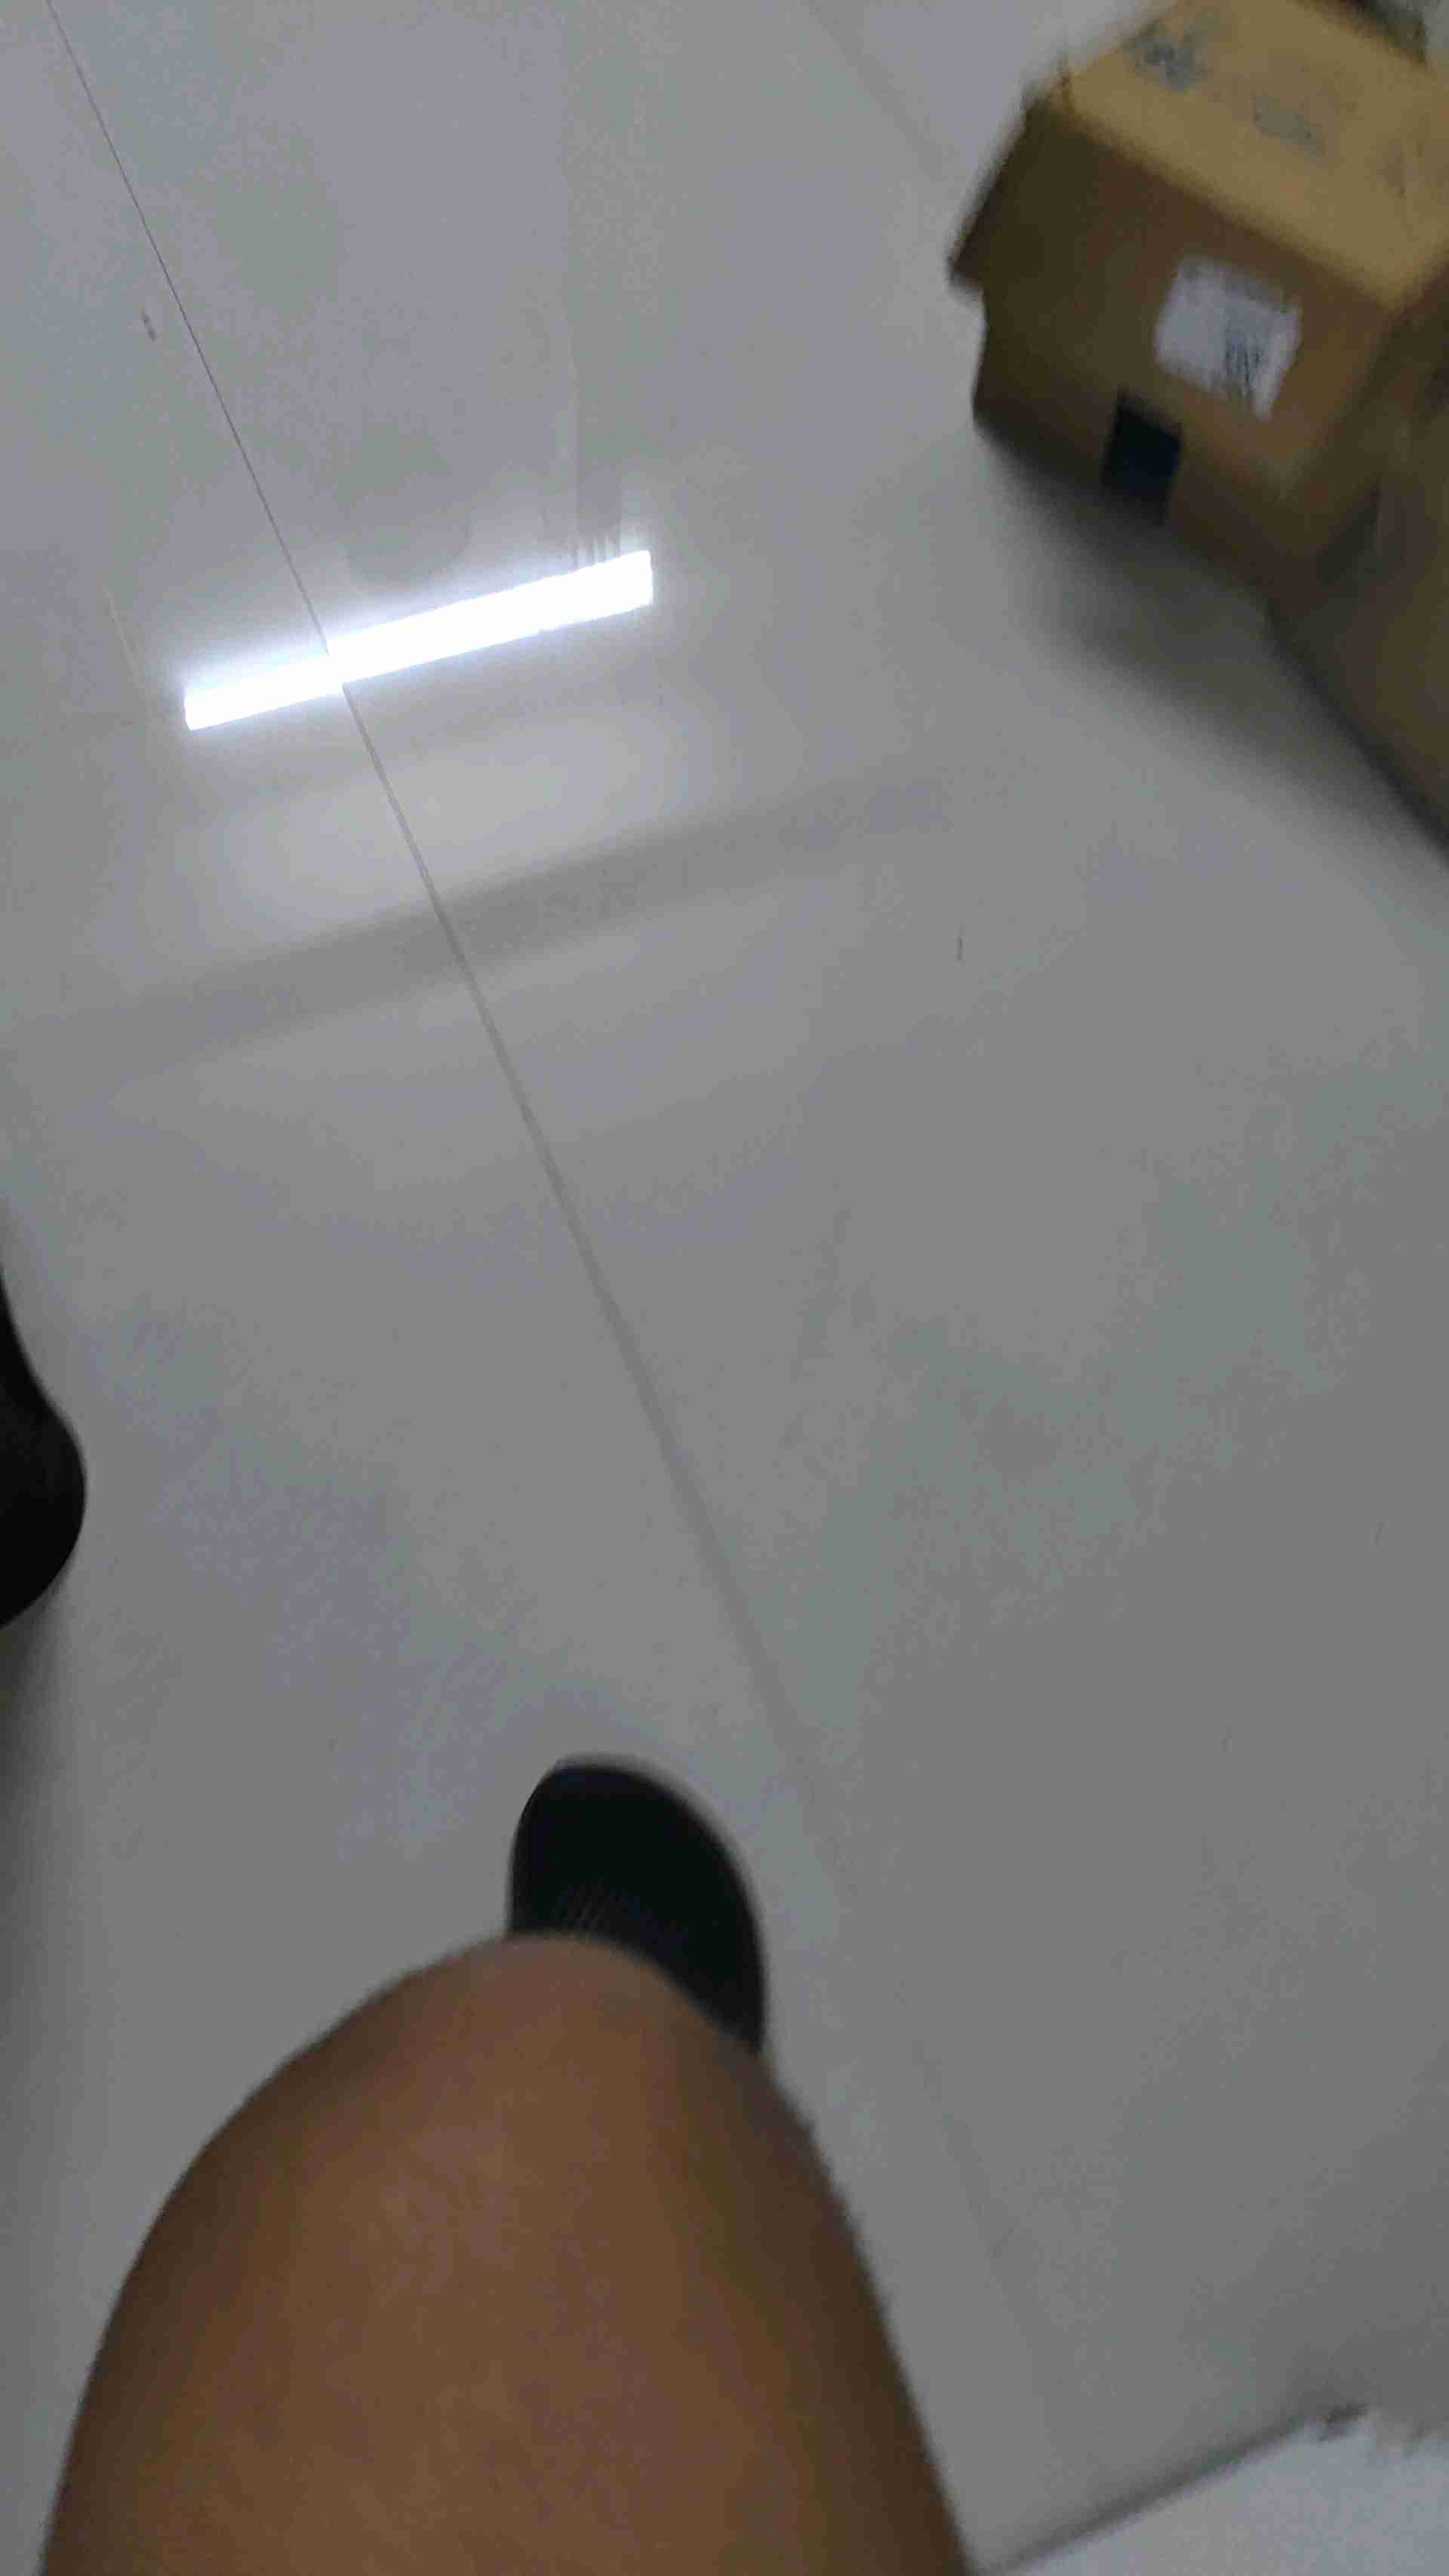

[]


In [53]:
input_mean = 0
input_std = 1

# image = Image.open('/home/mohit.srivastava@Brightlifecare.local/Desktop/TestingHair/fs/u9.jpg')
image = Image.open('/home/mohit.srivastava@Brightlifecare.local/Desktop/TestingPro/t2.jpg')
# image = Image.open('/home/mohit.srivastava@Brightlifecare.local/Desktop/TestingHair/29test/aj.jpg')
# image = Image.open('/home/mohit.srivastava@Brightlifecare.local/Analysis_Hair/input_images/neeraj.jpg')
image = image.convert("RGB")

print(type(image))
image_pred = image.resize((input_width ,input_height), Image.LANCZOS)
if model.get_input_details()[0]['dtype'] == np.float32:
  image_pred = (np.float32(image_pred) - input_mean) / input_std
image_pred = (image_pred * 255).astype(np.uint8)
print(image_pred)
results = detect_objects(model, image_pred, 0.1)

draw_image(image, results, image.size)
print(results)

In [49]:
def crop_img(image, results, size):
    result_size = len(results)
    for idx, obj in enumerate(results):
        # Prepare image for drawing
        draw = ImageDraw.Draw(image)

        # Prepare boundary box
        xmin, ymin, xmax, ymax = obj['bounding_box']
        xmin = int(xmin * size[1])
        xmax = int(xmax * size[1])
        ymin = int(ymin * size[0])
        ymax = int(ymax * size[0])
        return image.crop((ymin, xmin, ymax, xmax))

In [7]:
cropped_img = crop_img(image, results, image.size)
print(cropped_img)

NameError: name 'results' is not defined

In [ ]:
cv2.imwrite('')